In [2]:
# importing all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
# loading data into a pandas dataframe

df1 = pd.read_csv("twitter_training.csv", header=None)
df2 = pd.read_csv("twitter_validation.csv", header=None)


<h3>Analysing the contents of training csv file</h3>

In [4]:
df1.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
df1.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

In [6]:
df1.shape

(74682, 4)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


- Only the column 'Tweet content' has missing values

In [8]:
df1.describe(include='all')

,Tweet ID,entity,sentiment,Tweet content
count,74682.000000,74682,74682,73996
unique,NaN,32,4,69491
top,NaN,TomClancysRainbowSix,Negative,"At the same time, despite the fact that there ..."
freq,NaN,2400,22542,172
mean,6432.586165,NaN,NaN,NaN
std,3740.427870,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [9]:
# the most frequently occuring tweet
str = df1['Tweet content'].value_counts().idxmax() 

# all the tweets that contain the most frequent string
df1[df1['Tweet content'] == str] 

,Tweet ID,entity,sentiment,Tweet content
2294,1602,CallOfDutyBlackopsColdWar,Irrelevant,"At the same time, despite the fact that there ..."
2996,1719,CallOfDutyBlackopsColdWar,Positive,"At the same time, despite the fact that there ..."
3242,1763,CallOfDutyBlackopsColdWar,Neutral,"At the same time, despite the fact that there ..."
3938,1880,CallOfDutyBlackopsColdWar,Negative,"At the same time, despite the fact that there ..."
4232,1929,CallOfDutyBlackopsColdWar,Negative,"At the same time, despite the fact that there ..."
...,...,...,...,...
73232,8945,Nvidia,Positive,"At the same time, despite the fact that there ..."
73520,8993,Nvidia,Neutral,"At the same time, despite the fact that there ..."
73760,9036,Nvidia,Negative,"At the same time, despite the fact that there ..."
73970,9073,Nvidia,Positive,"At the same time, despite the fact that there ..."


In [10]:
# handling the missing values in df1 dataframe
before = df1.isnull().sum()

df1.replace("", np.nan, inplace = True)
df1.dropna(inplace=True)

after = df1.isnull().sum()

print(before)
print(after)

Tweet ID           0
entity             0
sentiment          0
Tweet content    686
dtype: int64
Tweet ID         0
entity           0
sentiment        0
Tweet content    0
dtype: int64


In [11]:
# dropping duplicate values

before = df1.duplicated().sum()

df1.drop_duplicates(inplace=True)

after = df1.duplicated().sum()

print(before)
print(after)

2340
0


<h3>Analysing the contents of validation csv file</h3>

In [12]:
df2.head()

,0,1,2,3
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
df2.columns = ['Tweet ID', 'entity', 'sentiment', 'Tweet content']

In [14]:
df2.shape

(1000, 4)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       1000 non-null   int64 
 1   entity         1000 non-null   object
 2   sentiment      1000 non-null   object
 3   Tweet content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


- No missing values are found

In [16]:
df2.describe(include='all')

,Tweet ID,entity,sentiment,Tweet content
count,1000.000000,1000,1000,1000
unique,NaN,32,4,999
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6432.088000,NaN,NaN,NaN
std,3728.310569,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3247.750000,NaN,NaN,NaN
50%,6550.000000,NaN,NaN,NaN
75%,9661.750000,NaN,NaN,NaN


In [17]:
# the most frequently occuring tweet
str = df2['Tweet content'].value_counts().idxmax() 

# all the tweets that contain the most frequent string
df2[df2['Tweet content'] == str] 

,Tweet ID,entity,sentiment,Tweet content
218,3263,Facebook,Positive,Wow
963,4050,CS-GO,Positive,Wow


<h5>As both the dataframes have been cleaned and prepared, we can combine them into one dataframe for further analysis</h5>

In [46]:
df = pd.concat([df1, df2],ignore_index=False)
df.head()

,Tweet ID,entity,sentiment,Tweet content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


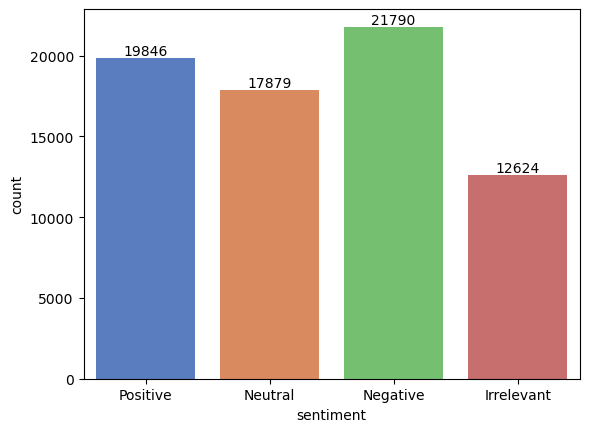

In [23]:
# distribution of sentiments

ax = sns.countplot(x='sentiment', data=df, palette='muted')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

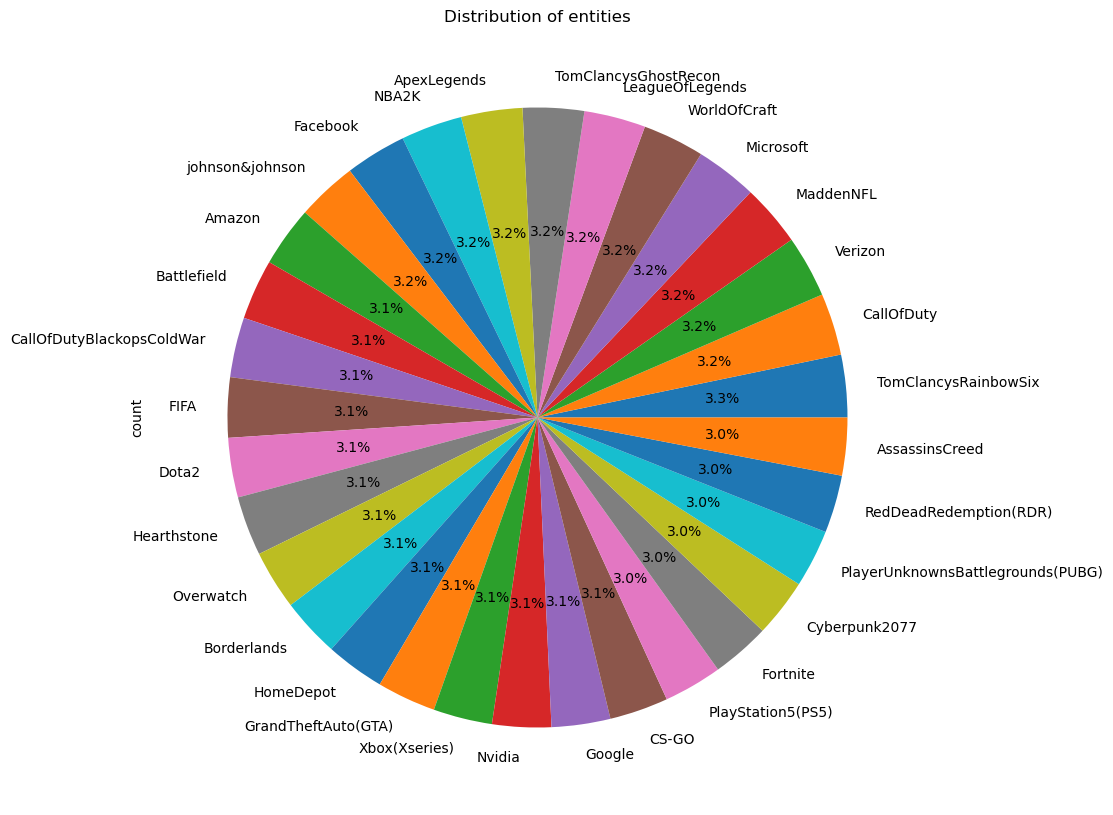

In [24]:
entity_content = df['entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')

plt.show()

In [62]:
df.drop(labels=['Tweet ID', 'Tweet content'], axis=1, inplace=True)


In [64]:
sentiment_count = df.groupby(['entity', 'sentiment']).size().reset_index(name='sentiment_count')
sentiment_count.head()

,entity,sentiment,sentiment_count
0,Amazon,Irrelevant,188
1,Amazon,Negative,571
2,Amazon,Neutral,1215
3,Amazon,Positive,309
4,ApexLegends,Irrelevant,188


In [67]:
sentiment_neg = sentiment_count[sentiment_count['sentiment'] == 'Negative']
sentiment_pos = sentiment_count[sentiment_count['sentiment'] == 'Positive']
sentiment_irr = sentiment_count[sentiment_count['sentiment'] == 'Irrelevant']
sentiment_neu = sentiment_count[sentiment_count['sentiment'] == 'Neutral']

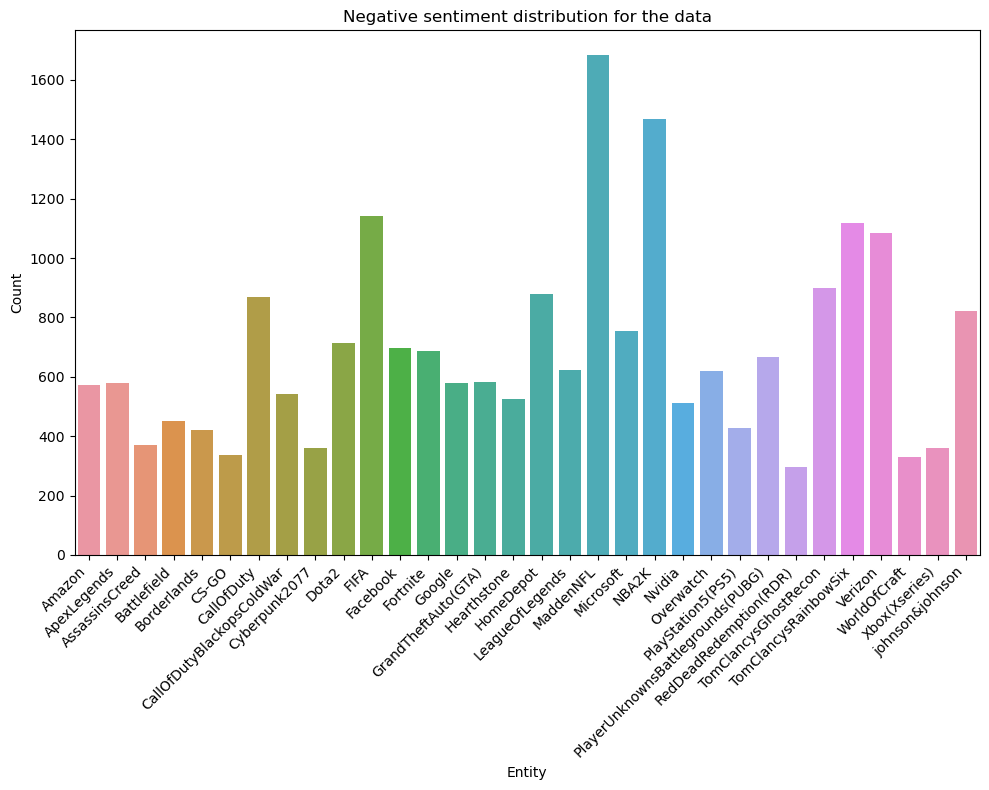

In [70]:
# Barplot

plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.barplot(x='entity', y='sentiment_count', data=sentiment_neg)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Negative sentiment distribution for the data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

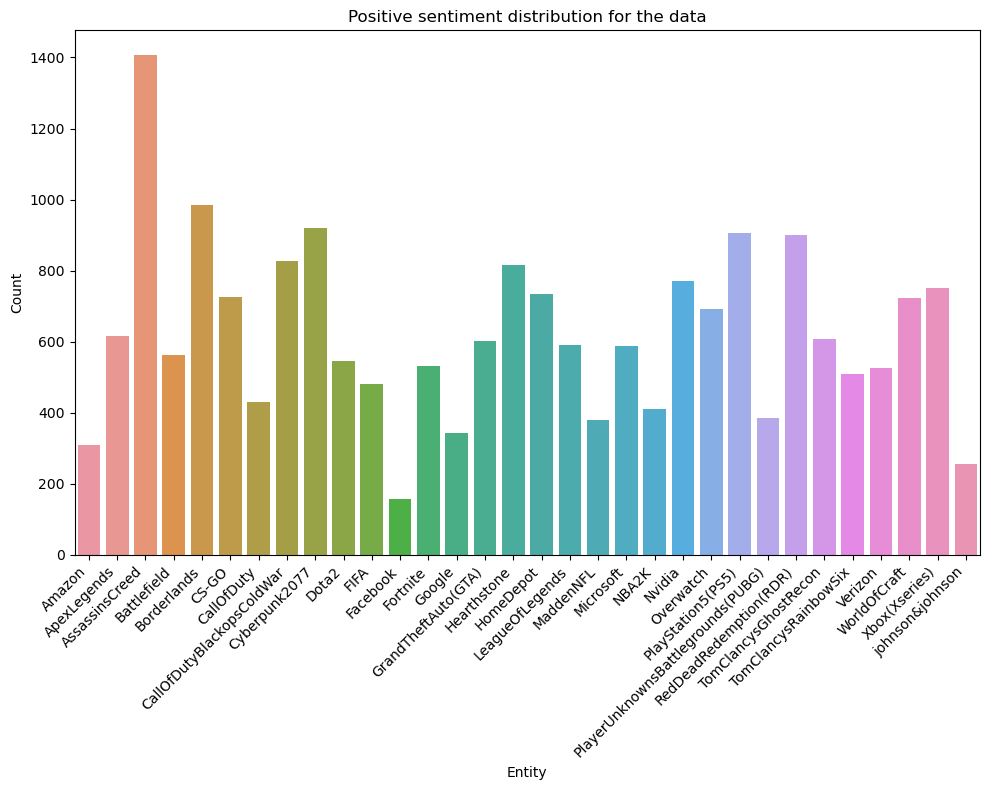

In [71]:
# Barplot

plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.barplot(x='entity', y='sentiment_count', data=sentiment_pos)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Positive sentiment distribution for the data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

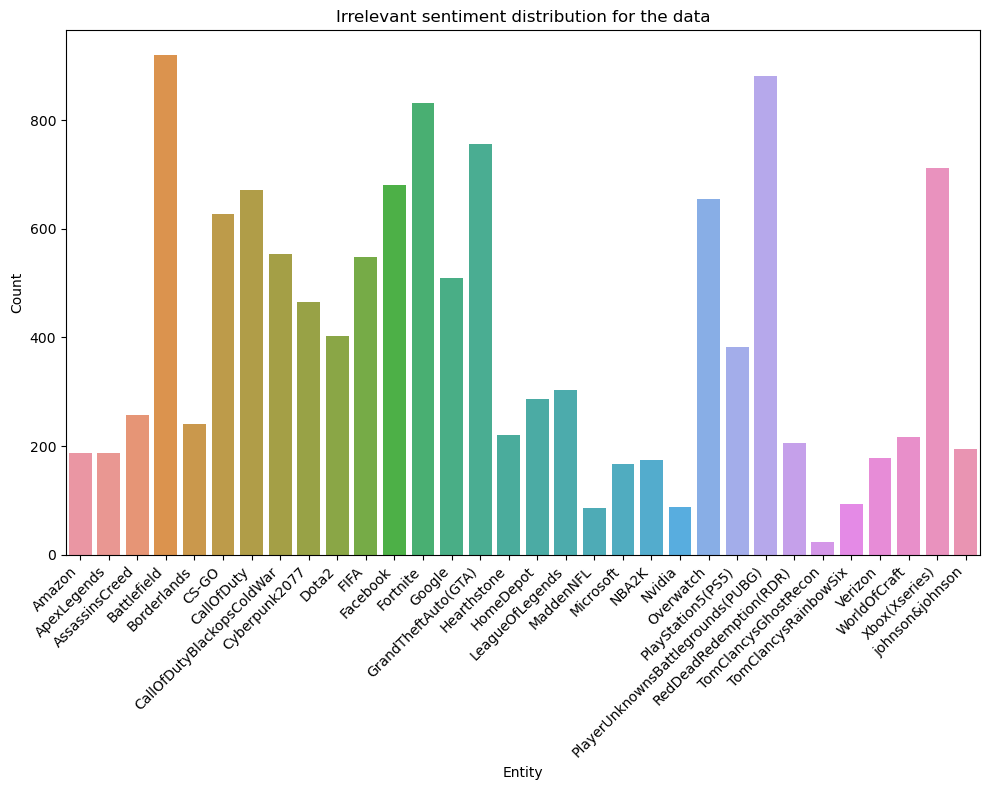

In [72]:
# Barplot

plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.barplot(x='entity', y='sentiment_count', data=sentiment_irr)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Irrelevant sentiment distribution for the data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()

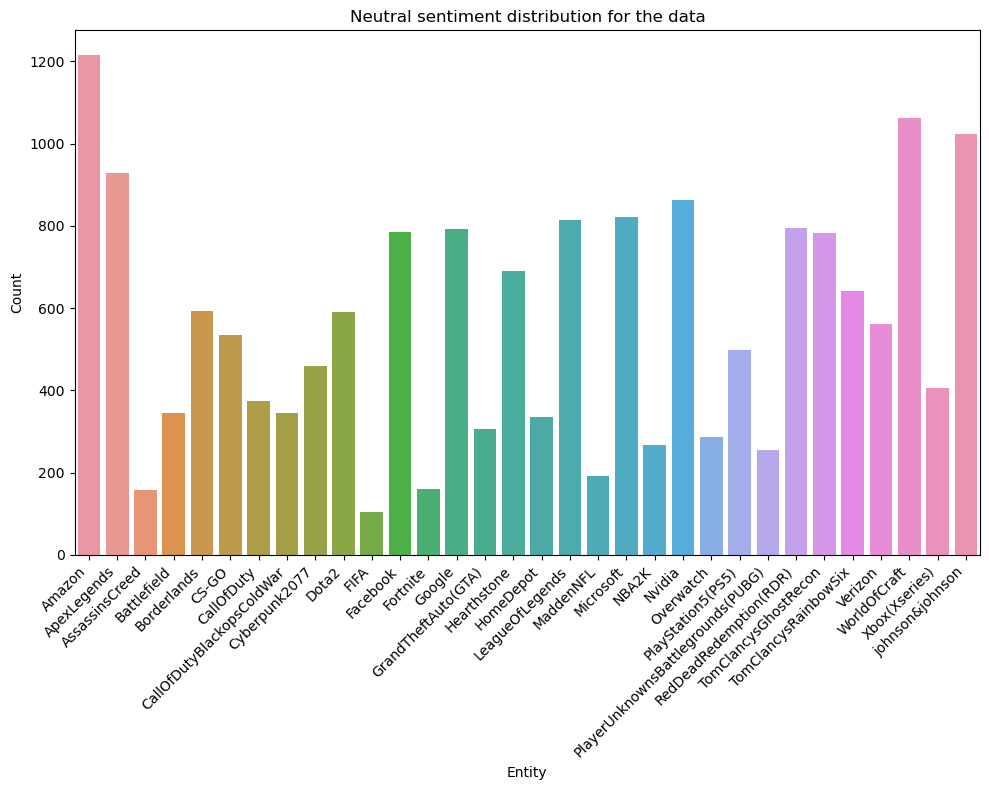

In [73]:
# Barplot

plt.figure(figsize=(10, 8))  # Adjust figure size for better visualization
sns.barplot(x='entity', y='sentiment_count', data=sentiment_neu)
plt.xlabel('Entity')
plt.ylabel('Count')
plt.title('Neutral sentiment distribution for the data')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()

plt.show()